<a href="https://colab.research.google.com/github/KimaniKibuthu/Customer-Segmentation-Unsupervised-ML-Model/blob/master/Customer_Segmentation_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

From the data given, try and segment the various customers that the business has. The business question is: **Can the customer base be grouped to develop customized relationships?**


The project will be undertaken in three steps:
1. Data collection
2. Data cleaning and exploration
3. Modelling.

# References
1. [Unsupervised Learning and Data Clustering](https://towardsdatascience.com/unsupervised-learning-and-data-clustering-eeecb78b422a)

2. 

# Variables and Functions

In [35]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold, train_test_split

# Data Collection

In [2]:
# Obtain data 
from google.colab import files
files.upload()

{}

In [3]:
# Save in variable
orders = pd.read_csv('/content/Orders - Analysis Task.csv')

# Data Cleaning and Exploration

In [4]:
# View data
orders.head()

,product_title,product_type,variant_title,variant_sku,variant_id,customer_id,order_id,day,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,DPR,DPR,100,AD-982-708-895-F-6C894FB,52039657,1312378,83290718932496,04/12/2018,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,RJF,Product P,28 / A / MTM,83-490-E49-8C8-8-3B100BC,56914686,3715657,36253792848113,01/04/2019,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,CLH,Product B,32 / B / FtO,68-ECA-BC7-3B2-A-E73DE1B,24064862,9533448,73094559597229,05/11/2018,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,53616575668264,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,NMA,Product F,40 / B / FtO,6C-1F1-226-1B3-2-3542B41,43823868,4121004,29263220319421,19/02/2019,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [5]:
# General info
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_title           70052 non-null  object 
 1   product_type            70052 non-null  object 
 2   variant_title           70052 non-null  object 
 3   variant_sku             70052 non-null  object 
 4   variant_id              70052 non-null  int64  
 5   customer_id             70052 non-null  int64  
 6   order_id                70052 non-null  int64  
 7   day                     70052 non-null  object 
 8   net_quantity            70052 non-null  int64  
 9   gross_sales             70052 non-null  float64
 10  discounts               70052 non-null  float64
 11  returns                 70052 non-null  float64
 12  net_sales               70052 non-null  float64
 13  taxes                   70052 non-null  float64
 14  total_sales             70052 non-null

In [6]:
# General info
orders.describe()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
count,7.005200e+04,7.005200e+04,7.005200e+04,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000,70052.000000
mean,2.442320e+11,6.013091e+11,5.506075e+13,0.701179,61.776302,-4.949904,-10.246051,46.580348,9.123636,55.703982,-0.156098,0.857277
std,4.255079e+12,6.223201e+12,2.587640e+13,0.739497,31.800689,7.769972,25.154677,51.802690,10.305236,61.920557,0.369190,0.380820
min,1.001447e+07,1.000661e+06,1.000657e+13,-3.000000,0.000000,-200.000000,-237.500000,-237.500000,-47.500000,-285.000000,-3.000000,0.000000
25%,2.692223e+07,3.295695e+06,3.270317e+13,1.000000,51.670000,-8.340000,0.000000,47.080000,8.375000,56.227500,0.000000,1.000000
50%,4.494514e+07,5.566107e+06,5.522207e+13,1.000000,74.170000,0.000000,0.000000,63.330000,12.660000,76.000000,0.000000,1.000000
75%,7.743106e+07,7.815352e+06,7.736876e+13,1.000000,79.170000,0.000000,0.000000,74.170000,14.840000,89.000000,0.000000,1.000000
max,8.422212e+13,9.977409e+13,9.999554e+13,6.000000,445.000000,0.000000,0.000000,445.000000,63.340000,445.000000,0.000000,6.000000


## Product Type & Title

In [7]:
# Unique values
print(orders['product_title'].unique())
print(orders['product_type'].unique())

['DPR' 'RJF' 'CLH' 'NMA' 'OTH' 'LQS' 'WHX' 'XEB' 'YQX' 'KNB' 'EYV' 'QID'
 'NWB' 'AYN' 'QMB' 'EXR' 'YMR' 'OUT' 'TSH' 'JAF' 'MAG' 'DAL' 'UQJ' 'INU'
 'ZQV' 'VXH' 'NSP' 'OVT' 'KDP' 'RIH' 'HZX' 'YYI' 'MTW' 'RJK' 'OHR' 'FQD'
 'ELV' 'CRH' 'AZN' 'EKJ' 'FTU' 'FMR' 'VTH' 'LPZ' 'JYJ' 'BKT' 'OJN' 'DFH'
 'PRT']
['DPR' 'Product P' 'Product B' 'Product F' 'Product C' 'Product D'
 'Product H' 'Product A' 'Product J' 'Product N' 'Product E' 'Product W'
 'Product R' 'Product M' 'Product I' 'Product K' 'Product L' 'Product T'
 'Product Q' 'Product U' 'Product G' 'Product O' 'Product S']


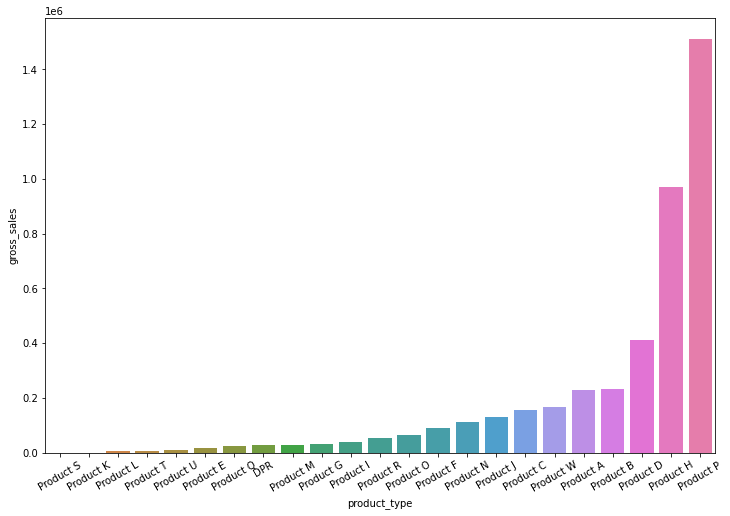

In [23]:
# Groupby product type
sales_type = pd.DataFrame(orders.groupby('product_type').sum()['gross_sales'].sort_values())

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=sales_type.index,
            y='gross_sales', 
            data= sales_type,
            palette='husl').set_xticklabels(rotation=30,
                                            labels=sales_type.index.unique());

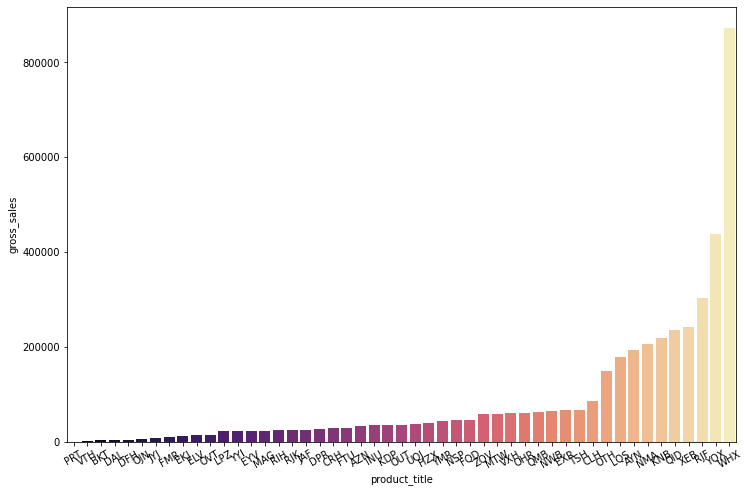

In [24]:
# Groupby product type
sales_type = pd.DataFrame(orders.groupby('product_title').sum()['gross_sales'].sort_values())

# Plot
plt.figure(figsize=(12,8))
sns.barplot(x=sales_type.index,
            y='gross_sales', 
            data= sales_type,
            palette='magma').set_xticklabels(rotation=30,
                                            labels=sales_type.index.unique());

Product P had the most sales. We can mostly use product type

## Variants

These variables are ID variables hence won't play a significant role in modelling

## Numerical variables

In [31]:
numericals = orders.select_dtypes(exclude='object')

numericals.head()

,variant_id,customer_id,order_id,net_quantity,gross_sales,discounts,returns,net_sales,taxes,total_sales,returned_item_quantity,ordered_item_quantity
0,52039657,1312378,83290718932496,2,200.0,-200.00,0.00,0.0,0.0,0.0,0,2
1,56914686,3715657,36253792848113,2,190.0,-190.00,0.00,0.0,0.0,0.0,0,2
2,24064862,9533448,73094559597229,0,164.8,-156.56,-8.24,0.0,0.0,0.0,-2,2
3,43823868,4121004,53616575668264,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1
4,43823868,4121004,29263220319421,1,119.0,-119.00,0.00,0.0,0.0,0.0,0,1


In [33]:
# Drop id

numericals.drop(['variant_id', 'customer_id', 'order_id'], axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


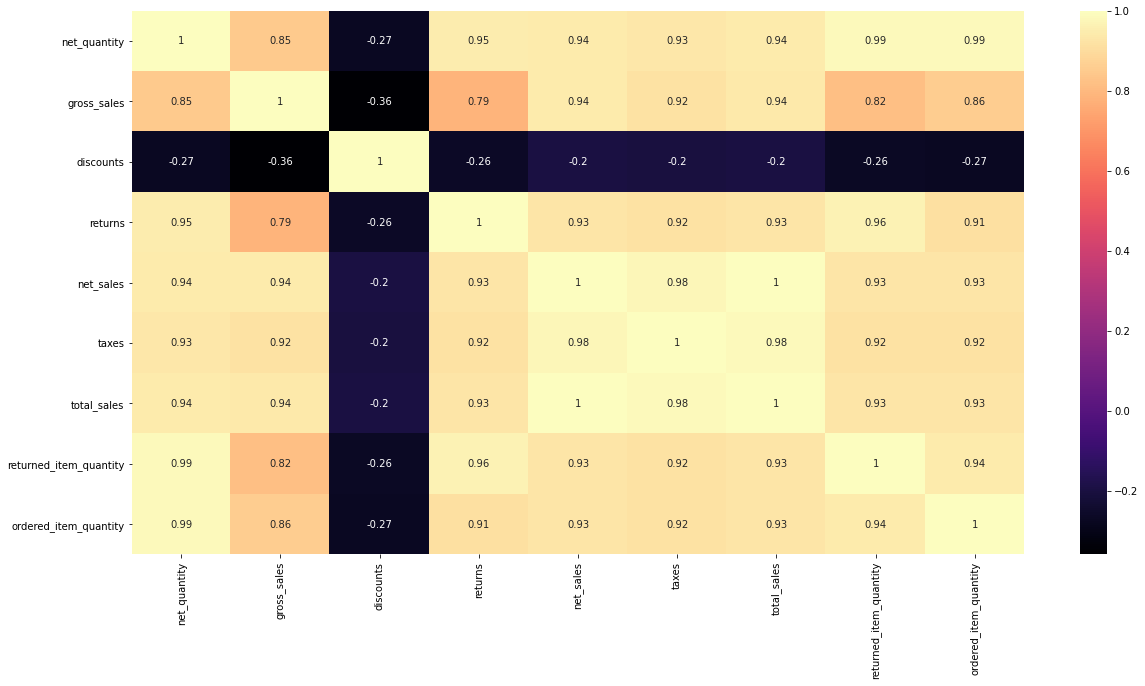

In [34]:
# View correlation matrix
plt.figure(figsize=(20,10))
sns.heatmap(numericals.corr(), annot=True, cmap='magma')

In [96]:
# Reduce dimensionality
pca = PCA(0.95)
scaler = MinMaxScaler()

scaled = scaler.fit_transform(numericals)

reduced = pca.fit_transform(scaled)

print(pca.explained_variance_ratio_)

numericals_final = pd.DataFrame(reduced, columns= [f'V_{i}' for i in range(reduced.shape[1])])

[0.92075202 0.03543748]


In [97]:
numericals_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70052 entries, 0 to 70051
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V_0     70052 non-null  float64
 1   V_1     70052 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


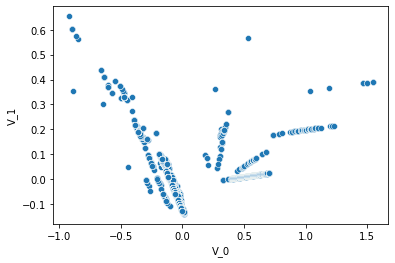

In [98]:
sns.scatterplot(x='V_0', y = 'V_1', data=numericals_final)

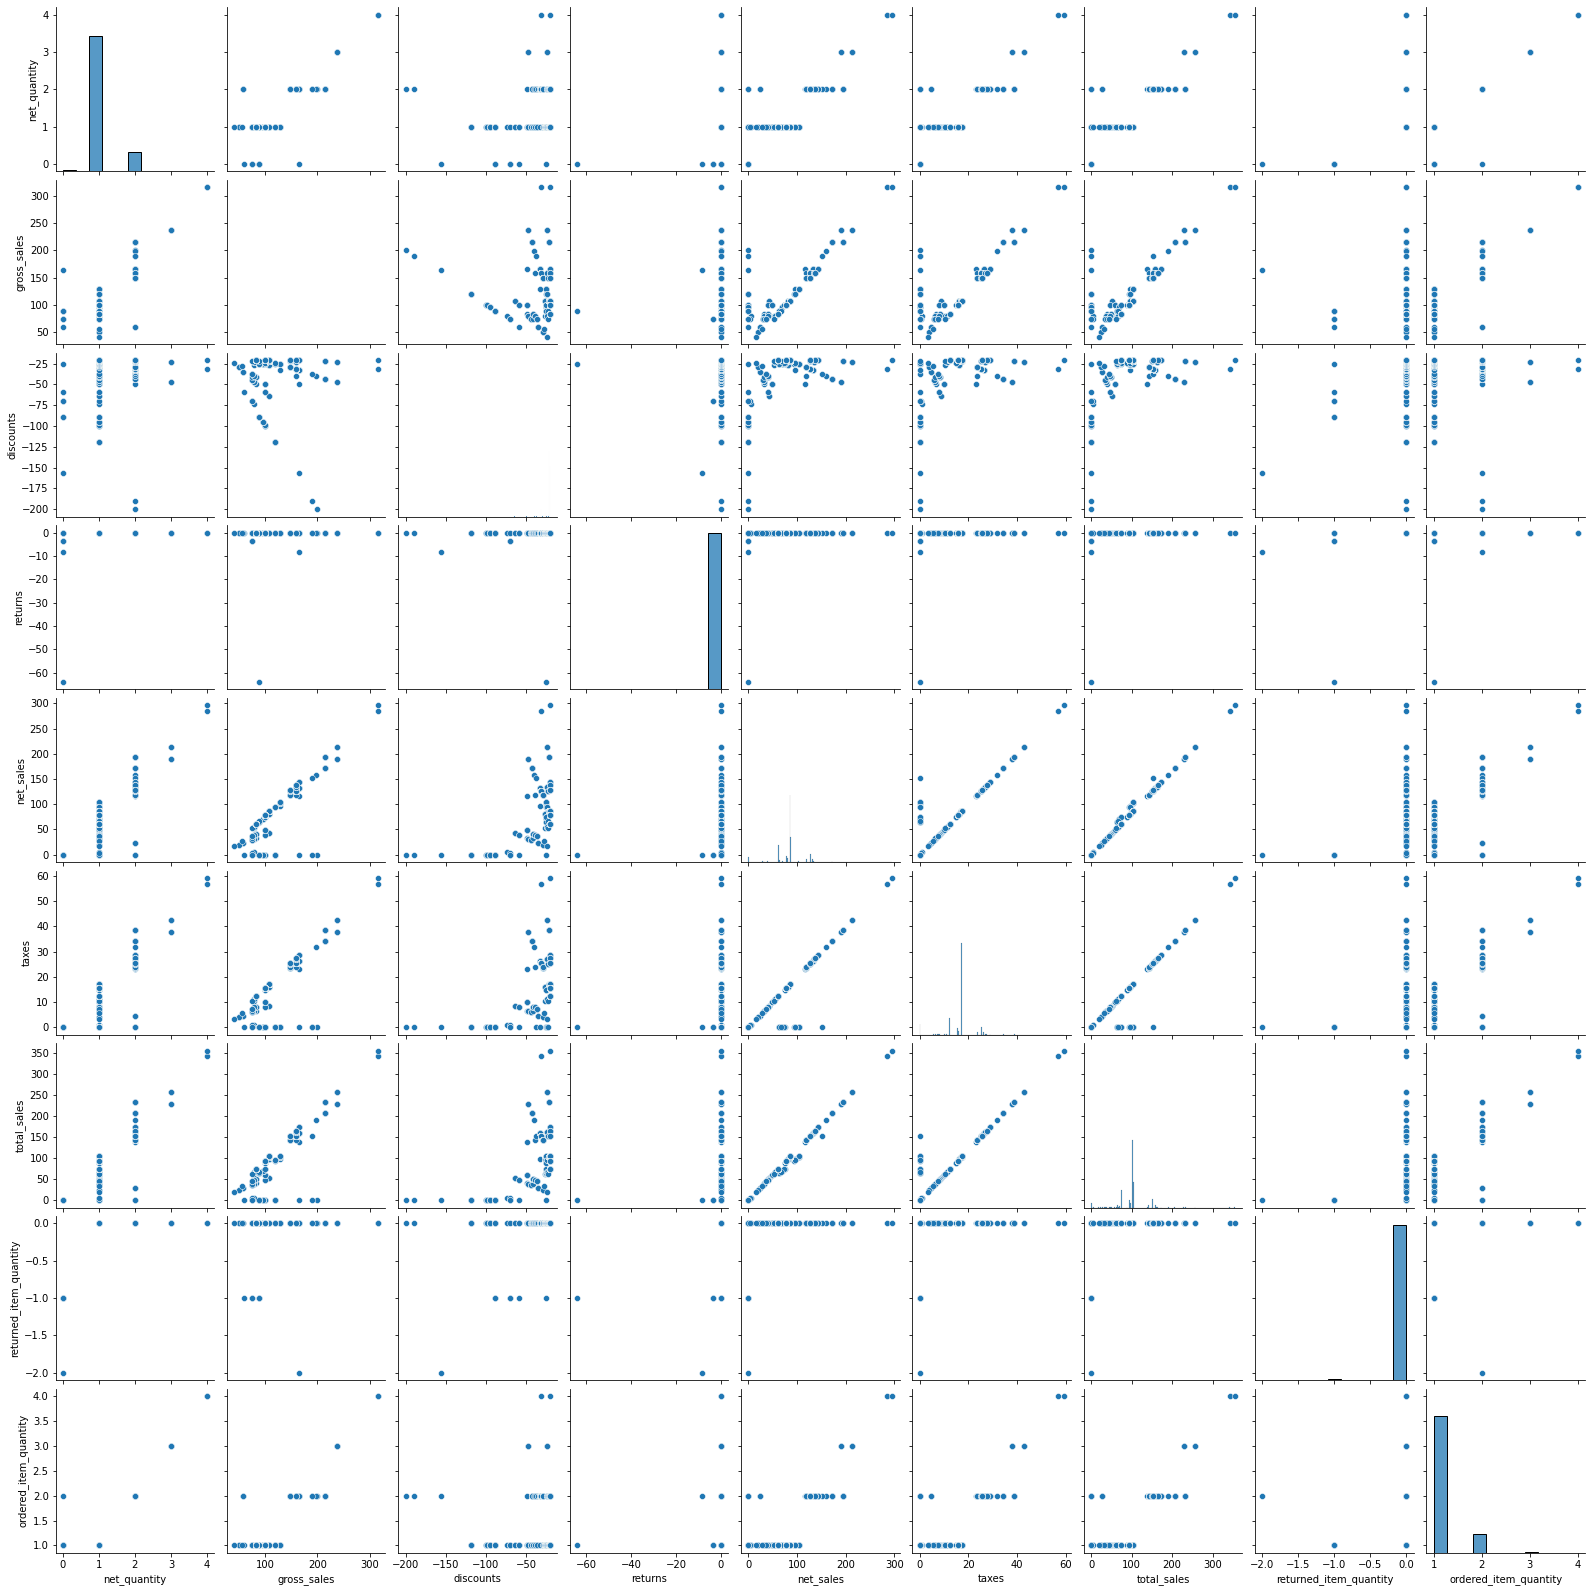

In [41]:
sns.pairplot(numericals[:1000])

In [89]:
scaled = scaler.fit_transform(numericals)

numericals_scaled = pd.DataFrame(scaled, columns=numericals.columns)

# Modelling

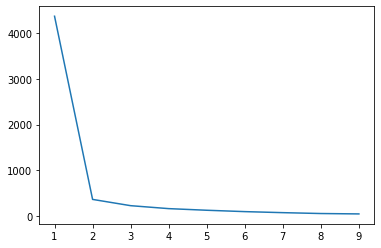

In [99]:
# Get the best clusters
inertias = []
clusters = list(range(1,10))
for i in clusters:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(numericals_final)
  inertias.append(kmeans.inertia_)

plt.plot(clusters, inertias);

In [100]:
# Plot with two clusters

kmeans = KMeans(2)

labels = kmeans.fit_predict(numericals_final)



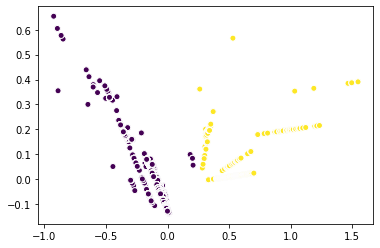

In [101]:
plt.scatter(numericals_final['V_0'], numericals_final['V_1'], c=labels, edgecolors='w')